# 对比训练集和测试集的图像特征

In [1]:
import os, sys
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

utils_path = os.path.join(this_path, '../../../../code/utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from img_features import *

In [2]:
h5_file = glob(os.path.join(this_path, 'Gen*.hdf5'))[0]
hf = h5py.File(h5_file)

real_img = hf['real_shower']
fake_img = hf['gen_shower']

In [3]:
compare_data = {}
for func in [getEtot, getMax, getSecmom, getE5x5, getCenterE]:
    df = pd.DataFrame()
    df['real_img'] = [func(img) for img in real_img]
    df['fake_img'] = [func(img) for img in fake_img]
    compare_data[func.__name__] = df.copy()   

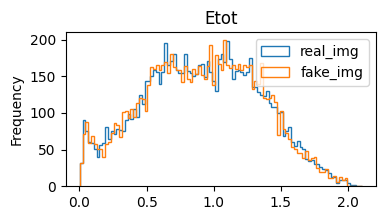

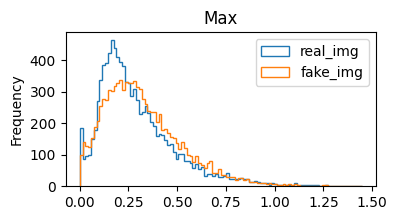

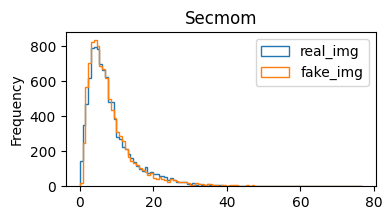

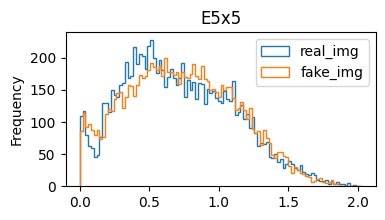

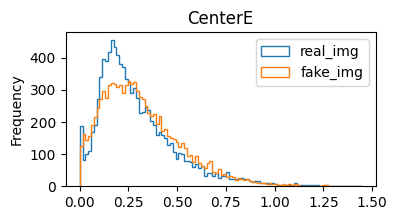

In [4]:
for k, data in compare_data.items():
    data.plot.hist(figsize=(4,2), bins=100, histtype='step', title=k[3:])
    plt.show()